In [1]:
import pandas as pd
import sqlalchemy
import numpy as np
from sqlalchemy import create_engine, MetaData, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from sqlalchemy import func
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [4]:
# Assign the measurment and station class to a variable called `measurement` and 'station'
measurement = Base.classes.measurement
station = Base.classes.station

In [5]:
# Create a session
session = Session(engine)

In [6]:
year_ago = dt.date.today() - dt.timedelta(days=365)
##print(year_ago)
prcp_result= session.query(measurement.date,measurement.prcp).filter(measurement.date > year_ago).all()

In [7]:
prcp_df = pd.DataFrame(prcp_result,columns=['date','prcp'])
prcp_df.set_index('date',inplace = True)

In [8]:
from matplotlib import style
style.use('fivethirtyeight')

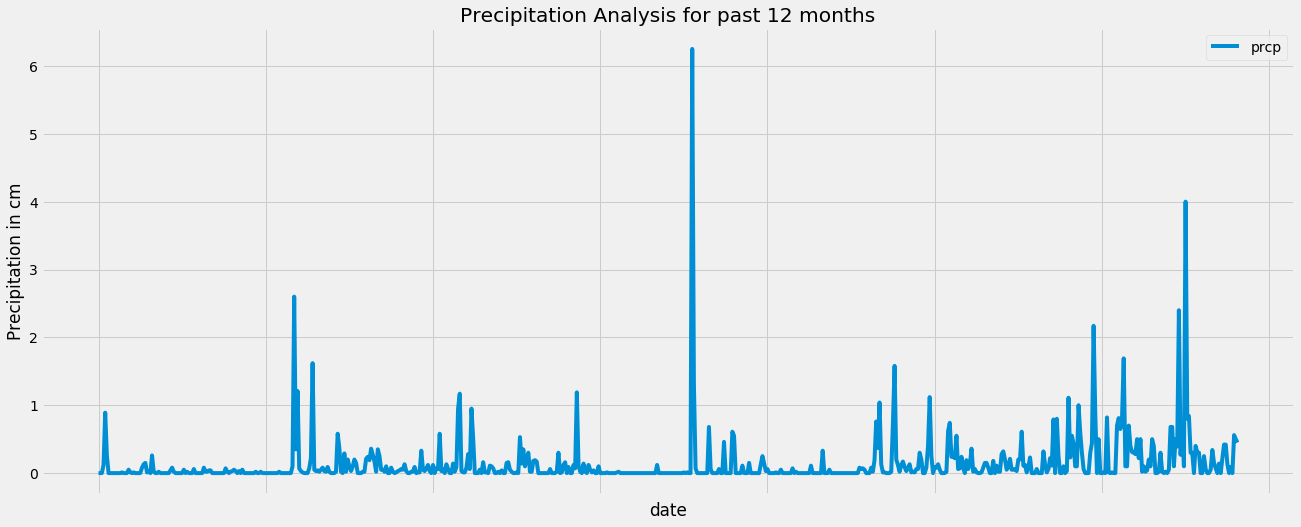

In [9]:
prcp_df.plot(title = "Precipitation Analysis for past 12 months",figsize=(20,8))
plt.ylabel("Precipitation in cm")
plt.savefig("Precipitation Analysis.JPG")
plt.show()

In [10]:
prcp_df.describe()

,prcp
count,682.000000
mean,0.138123
std,0.391030
min,0.000000
25%,0.000000
50%,0.020000
75%,0.110000
max,6.250000


In [11]:
session.query(station.station).count()

9

In [12]:
active_stations = session.query(measurement.station,func.count(measurement.tobs)).\
              group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()    

In [13]:
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
most_active = active_stations[0][0]

In [15]:
most_active

'USC00519281'

In [16]:
past_mnth_temp = session.query(measurement.station,measurement.tobs).\
              filter(measurement.date > year_ago).filter(measurement.station == most_active).all()

In [17]:
##Unpack the data into two lists
tobs_list = [x[1] for x in past_mnth_temp]

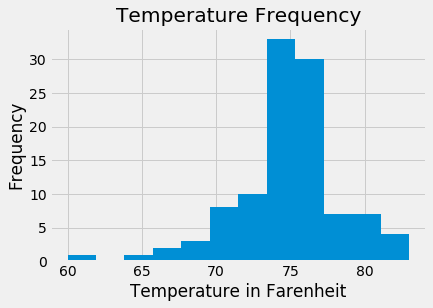

In [18]:
plt.hist(tobs_list,bins=12)
plt.title("Temperature Frequency")
plt.ylabel("Frequency")
plt.xlabel("Temperature in Farenheit")
plt.savefig("Temperature Plot.JPG")
plt.show()

In [25]:
import time
def calc_temp(st_dt,end_dt):
    if(st_dt > end_dt):
        print("End date should be greater than Start date")
        return;
    today_date = dt.date.today()
 ## if the dates are future calculate the previous year dates   
    if (st_dt>= str(today_date)):
        st_year = time.strptime(st_dt,'%Y-%m-%d').tm_year
        prev_year = st_year -1
        st_dt = st_dt.replace(str(st_year),str(prev_year))
        end_year = time.strptime(end_dt,'%Y-%m-%d').tm_year
        prev_year = end_year -1
        end_dt= end_dt.replace(str(st_year),str(prev_year))
                
    temp =session.query(func.max(measurement.tobs),func.min(measurement.tobs),\
                        func.avg(measurement.tobs)).\
                      filter(measurement.date>st_dt,measurement.date < end_dt).all()
    temp_df = pd.DataFrame(temp,columns=['Max','Min','Mean',])
    
        
    return temp_df;
    

In [26]:
temp_df = calc_temp('2018-04-25','2018-06-16')

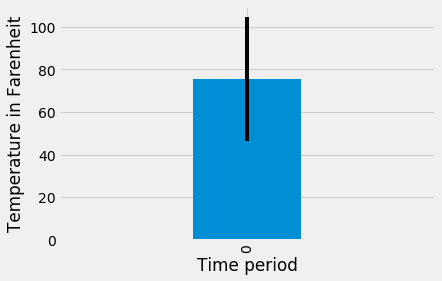

In [27]:
peak =int(temp_df.loc[0,'Max'])- int(temp_df.loc[0,'Min'])
temp_df['Mean'].plot.bar(width=.2,yerr=peak)
plt.ylabel("Temperature in Farenheit")
plt.xlabel("Time period")
plt.savefig("Bar plot for temperature.JPG")
plt.show()